# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [1]:
import pandas as pd
%matplotlib inline

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the "correct" name. You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*.

In [2]:
#install a new library: read the error message. it says no module called 'xlrd'
#so in terminal you pip install xlrd.
pd.read_excel("richpeople.xlsx")

#set a new variable

df = pd.read_excel("richpeople.xlsx")


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [3]:
df.shape

#it has 2614 rows and 30 columns.

(1653, 30)

In [4]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [18]:
df.sort_values(by="networthusbillion" , ascending=False).head(10)[['name','networthusbillion']]

,name,networthusbillion
184,Bill Gates,76.0
226,Carlos Slim Helu,72.0
79,Amancio Ortega,64.0
1562,Warren Buffett,58.2
862,Larry Ellison,48.0
339,David Koch,40.0
247,Charles Koch,40.0
1364,Sheldon Adelson,38.0
280,Christy Walton,36.7
724,Jim Walton,34.7


## 4) How many male billionaires are there compared to the number of female billionares? Do they have a different average wealth?

> **TIP:** The second part uses `groupby`, but the first part does not.

In [14]:
df['gender'].value_counts()

male      1473
female     180
Name: gender, dtype: int64

In [15]:
df.groupby('gender')['networthusbillion'].mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5) Who is the poorest billionaire? Who are the top 10 poorest billionaires?

In [17]:
#df['networthusbillion'].min()

df.sort_values(by="networthusbillion").head(1)['name']

156    B.R. Shetty
Name: name, dtype: object

In [172]:
df.sort_values(by="networthusbillion" , ascending=True).head(10)[['name','networthusbillion']]

,name,networthusbillion
156,B.R. Shetty,1.0
1310,Rostam Azizi,1.0
1497,Tory Burch,1.0
476,Fred Chang,1.0
115,Angela Bennett,1.0
485,Fu Kwan,1.0
1318,Ryan Kavanaugh,1.0
1133,O. Francis Biondi,1.0
859,Lam Fong Ngo,1.0
456,Feng Hailiang,1.0


## 6) What is the most common source of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???

In [19]:
df.groupby('gender')['sourceofwealth'].describe()

,count,unique,top,freq
gender,,,,
female,172,100,diversified,9
male,1464,578,real estate,100


## 7) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like oyu should use `groupby`, but don't! There's an easier way to count.

In [20]:
df["company"].value_counts().head(10)

Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Walmart                 6
Alfa Group              6
Cargill                 6
Votorantim Group        6
Tingyi                  5
Glencore Xstrata        5
Samsung                 5
Name: company, dtype: int64

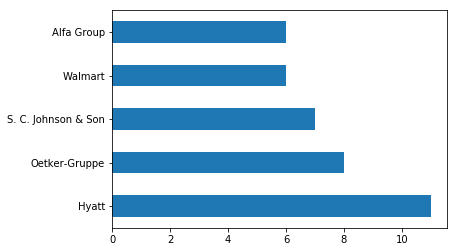

In [21]:
df["company"].value_counts().head(5).plot(kind='barh')

## 8) How much money do these billionaires have in total?

In [22]:
df["networthusbillion"].sum()

6454.4000000000005

## 9) What are the top 3 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is total amount of money per country.

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," and "I want to add it all up." Just chain them all together.

In [23]:
df.groupby('citizenship')['networthusbillion'].sum().sort_values(ascending=False).head(3)

citizenship
United States    2322.4
Russia            422.5
Germany           401.4
Name: networthusbillion, dtype: float64

## 10) How old is an average billionaire? How old are billionaires self made vs. non self made? 

In [24]:
df['age'].mean()

63.342138364779878

In [27]:
df.groupby('selfmade')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
selfmade,,,,,,,,
inherited,476.0,64.962185,13.174403,24.0,56.0,65.0,74.0,98.0
self-made,1112.0,62.625899,13.054631,29.0,52.0,62.0,72.0,96.0


## 11) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

In [28]:
df[['age', 'name']].sort_values(by='age').head(10)

,age,name
1172,24.0,Perenna Kei
397,29.0,Dustin Moskovitz
1004,29.0,Mark Zuckerberg
127,29.0,"Anton Kathrein, Jr."
394,30.0,Drew Houston
28,30.0,Albert von Thurn und Taxis
406,31.0,Eduardo Saverin
1340,31.0,Scott Duncan
1607,32.0,Yang Huiyan
991,33.0,Marie Besnier Beauvalot


In [29]:
df[['age', 'name']].sort_values(by='age' , ascending=False).head(10)

,age,name
343,98.0,"David Rockefeller, Sr."
816,96.0,Karl Wlaschek
836,96.0,Kirk Kerkorian
588,95.0,Henry Hillman
435,95.0,Erika Pohl-Stroher
1428,94.0,Sulaiman Al Rajhi
122,94.0,Anne Cox Chambers
815,94.0,Karl Albrecht
77,93.0,Aloysio de Andrade Faria
1560,93.0,Wang Yung-Tsai


## 12) Make a scatterplot of their net worth compared to their age

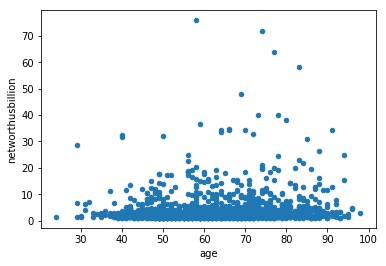

In [30]:
df.plot(kind="scatter", x="age", y="networthusbillion")

## 13) Make a bar graph of the top 10 richest billionaires

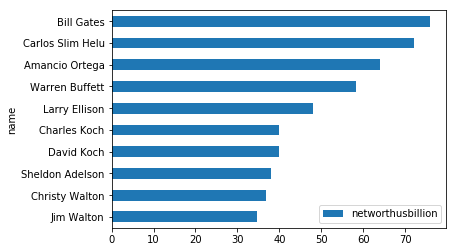

In [31]:
#df["networthusbillion"].value_counts().head(10)

df.sort_values(by="networthusbillion").tail(10).plot(kind='barh', x = 'name', y= 'networthusbillion')



